# Implementation of MCP Neuron for AND and OR Function.

In [1]:
def MCP_Neurons_AND(X1, X2, T):
  """
  This functions implements basic AND operations with MCP Neuron for two inputs.
  Arguments:
  Inputs:
  X1 (1 nd array): An array of binary values.
  X2 (1 nd array): An array of binary values.
  Output:
  state_neuron(1D-list): An state of neuron 1 0r 0 for the particular inputs.
  """
  assert len(X1) == len(X2)
  # Perform an element wise addition of two input arrays stored in a new array(list):
  summed_inputs = [X1 + X2 for X1, X2 in zip(X1, X2)]
  # Create a new array to put all the prediction let's name that a state_neuron.
  state_neuron = []
  # Append 1 in sate_neuron if sum (element) of above list is above Threshold else append 0.
  for sum_value in summed_inputs:
    if sum_value >= T:
      state_neuron.append(1)
    else:
      state_neuron.append(0)

  return state_neuron

In [2]:
# Example usage for MCP_Neurons_AND function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 2  # Threshold value

# Call the MCP_Neurons_AND function
result = MCP_Neurons_AND(X1, X2, T)

# Print the result
print(f"Output of AND gate for inputs {X1} and {X2} with threshold {T}: {result}")


Output of AND gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 2: [0, 0, 0, 1]


In [3]:
def MCP_Neurons_OR(X1, X2, T):
    """
    This function implements basic OR operations with MCP Neuron for two inputs.
    Arguments:
    Inputs:
    X1 (1D array): An array of binary values.
    X2 (1D array): An array of binary values.
    Output:
    state_neuron (1D list): The state of the neuron (1 or 0) for the particular inputs.
    """
    assert len(X1) == len(X2)
    ### YOUR CODE HERE ###
    # Perform an element wise addition of two input arrays stored in a new array(list):
    summed_inputs = [X1 + X2 for X1, X2 in zip (X1, X2)]
    # Create a new array to put all the prediction let's name that a state_neuron.
    state_neuron = []
    # Append 1 in sate_neuron if sum (element) of above list is above Threshold else append 0.
    for summed_value in summed_inputs:
      if summed_value >= T:
        state_neuron.append(1)
      else:
        state_neuron.append(0)
    return state_neuron


In [4]:
# Example usage for MCP_Neurons_OR function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 1  # Threshold value for OR gate

# Call the MCP_Neurons_OR function
result_or = MCP_Neurons_OR(X1, X2, T)

# Print the result
print(f"Output of OR gate for inputs {X1} and {X2} with threshold {T}: {result_or}")


Output of OR gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 1: [0, 1, 1, 1]


### **3.2.1 Answer the Following Question:**
- You can use Text cell of your notebook to answer the question.


- Question - 1: List out all the limitations of MCP - Neurons.

  - The binary nature restricts the model's ability to handle real-world data like continuous data.

  - The model can only solve linearly separable problems.

  - The operaion of an MCP neuron depends on a predefined threshold which is manually set and is not adaptable during processing.

  - MCP neurons do not have a mechanism for learning from data and they cannot adjust their weights or thresholds based on input data.

- Question - 2: Think if you can develop a logic to solve for XOR function using MCP Neuron.
{Can you devise a if else rules.}

  - The XOR function is not linearly separable and cannot be solved by a single MCP neuron. However it can be solved by using multi-layer approach with MCP neurons.

In [5]:
def MCP_Neurons_XOR(X1, X2):
  # First Layer
  nand = [1 if (X1 + X2) < 2 else 0 for X1,X2 in zip (X1,X2) ]
  or_func = [1 if (X1 + X2) > 0 else 0 for X1,X2 in zip (X1,X2)]

  # Second Layer
  xor = [1 if (n + o) > 1 else 0 for n, o in zip (nand, or_func)]

  return xor

In [6]:
# Example usage for MCP_Neurons_OR function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]

# Call the MCP_Neurons_OR function
result_xor = MCP_Neurons_XOR(X1, X2)

# Print the result
print(f"Output of XOR gate for inputs {X1} and {X2}: {result_xor}")


Output of XOR gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1]: [0, 1, 1, 0]


# Implementation for 0 Vs. 1 Classification.

## Step 1: Load the Dataset

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the dataset
df_0_1 = pd.read_csv("/content/drive/MyDrive/AL and ML/Workshop 3/mnist_0_and_1.csv")  # Add the correct file path if necessary

# Extract features and labels
X = df_0_1.drop(columns=["label"]).values  # 784 pixels
y = df_0_1["label"].values  # Labels (0 or 1)

# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)


Feature matrix shape: (12665, 784)
Label vector shape: (12665,)


**Answer the Following Question:**

1. Question - 1: What does the shape of X represent?

- The shape of X represents all the 12665 entries and 784 features which are pixel values. The X needs to be classified in 0 and 1 class

2. Question - 2: What does the shape of Y represent?

- The shape of Y represent the label which classifies the pixel in 0 and 1 class. Y has 12665 entries.

### Viewing the Dataset.

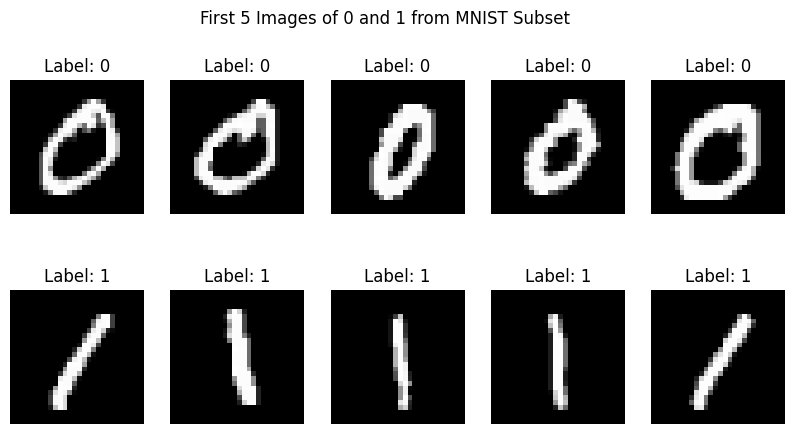

In [9]:
# Separate images for label 0 and label 1
images_0 = X[y == 0]  # Get all images with label 0
images_1 = X[y == 1]  # Get all images with label 1

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Check if the arrays have the required amount of data
if len(images_0) < 5 or len(images_1) < 5:
    print("Error: Not enough images in images_0 or images_1 to plot 5 images.")
else:
    for i in range(5):
        # Plot digit 0
        axes[0, i].imshow(images_0[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 0")
        axes[0, i].axis("off")
        # Plot digit 1
        axes[1, i].imshow(images_1[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 1")
        axes[1, i].axis("off")
    plt.suptitle("First 5 Images of 0 and 1 from MNIST Subset")
    plt.show()

## Step - 2 - Initializing the Weights:

In [10]:
# Initialize weights and bias
weights = np.zeros(X.shape[1])  # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

**Answer the Following Question:**

1. Question - 3: What does the weights array represent in this context?

- The weights array represents the importance of each pixel in the image when making a decision about whether the image is a 0 or 1. The weight decides how much influence the input will have on output.  


2. Question - 4: Why are we initializing the weights to zero? What effect could this
have on the training process?

- The weights are initialized to zero to make the models treat all pixels equally and doesn;t favor any specific pattern. Due to 0 initialization of weight, the model might struggle to learn properly. Therefore, it's better to start with small random weights instead of zero.  

## Step - 3 - Make a Decision function:

In [11]:
import numpy as np

def decision_function(X, weights, bias):
    """
    Compute the predicted labels for the input data.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - weights: Updated weights after training
    - bias: Updated bias after training

    Returns:
    - y_pred_all: The predicted labels for the input data
    """
    predictions = np.dot(X, weights) + bias
    y_pred_all = np.where(predictions >= 0, 1, 0)

    return y_pred_all

## Step - 3 - Implement the Perceptron Learning Algorithm

In [14]:
def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """
    Train the perceptron using the Perceptron Learning Algorithm.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - y: Labels (true output) as a numpy array of shape (n_samples,)
    - weights: Initial weights as a numpy array of shape (n_features,)
    - bias: Initial bias value (scalar)
    - learning_rate: Learning rate for weight updates (default is 0.1)
    - epochs: Number of iterations to train the model (default is 100)

    Returns:
    - weights: Updated weights after training
    - bias: Updated bias after training
    - accuracy: Total correct prediction.
    """
    # Step 3: Perceptron Learning Algorithm
    # Your Code here#
    for epoch in range(epochs):
      y_pred = decision_function(X, weights, bias)
      for i in range(X.shape[0]):
        error = y[i] - y_pred[i]

        weights += learning_rate * error * X[i]

        bias += learning_rate * error

      y_pred = decision_function(X, weights, bias)
      accuracy = np.mean(y_pred == y)

      if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}, Accuracy: {accuracy:.4f}")

    return weights, bias, accuracy

**Answer the Following Question:**
1. Question - 5: What is the purpose of the output = np.dot(X[i], weights) + bias line?

  - The line output = np.dot(X[i], weights) + bias is a crucial part of the perceptron algorithm. It computes the weighted sum of the inputs (features) for a single data point X[i]

2. Question - 6: What happens when the prediction is wrong? How are the weights and
bias updated?

  - When the prediction is wrong, the perceptron learning algorithm updates the weight and bias to decrease the loss. New weight is updated bu following equation: old weights + (Learning Rate X Error X Input (Features)). Similarly Bias is update by adding the (Learing Rate X Error) to old bias.

3. Question - 7:Why is the final accuracy important, and what do you expect it to be?

  - The final accuracy is pivotal in evaluating the performance of a model. The accuracy represents the proportion of corectly classified instances out of total number of instances in the dataset. I expect the accuracy to be above 90%.

## Training the Perceptron

In [15]:
# After training the model with the perceptron_learning_algorithm
weights, bias, accuracy = train_perceptron(X, y, weights, bias)

# Evaluate the model using the new function
print("The Final Accuracy is: ", accuracy)

Epoch 10, Accuracy: 0.9976
Epoch 20, Accuracy: 0.9979
Epoch 30, Accuracy: 0.9979
Epoch 40, Accuracy: 0.9980
Epoch 50, Accuracy: 0.9980
Epoch 60, Accuracy: 0.9981
Epoch 70, Accuracy: 0.9982
Epoch 80, Accuracy: 0.9983
Epoch 90, Accuracy: 0.9982
Epoch 100, Accuracy: 0.9984
The Final Accuracy is:  0.9984208448480063


## Step 5: Visualize Misclassified Images

Final Accuracy: 0.9984


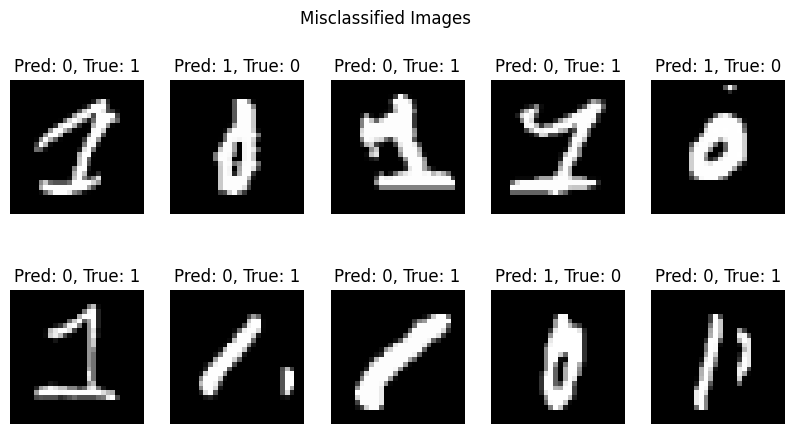

In [16]:
# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)

# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")

# Step 5: Visualize Misclassified Images
misclassified_idx = np.where(y_pred != y)[0]
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Show 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")

**Answer the Following Question:**
1. Question - 8:What does misclassified idx store, and how is it used in this code?
  - The variable misclassified_idx stores the indices of the data points (images) that were incorrectly classified by the model. It is used in the code to identify abd visualize the misclassified images.
2. Question - 9: How do you interpret the result if the output is ”All images were
correctly classified!”?

  - If the output is "All images were correctly classified!", it means that the model achieved 100% accuracy. Therefore, the model correctly predicted the label for every single image in the dataset.

## Perceptron Algorithm for 3 vs 5 Classification

In [17]:
df_3_5 = pd.read_csv("/content/drive/MyDrive/AL and ML/Workshop 3/mnist_3_and_5.csv")

# Extract features and labels
X = df_3_5.drop(columns=["label"]).values  # 784 pixels
y = df_3_5["label"].values  # Labels (3 or 5)

# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)

Feature matrix shape: (2741, 784)
Label vector shape: (2741,)


## Viewing the Dataset


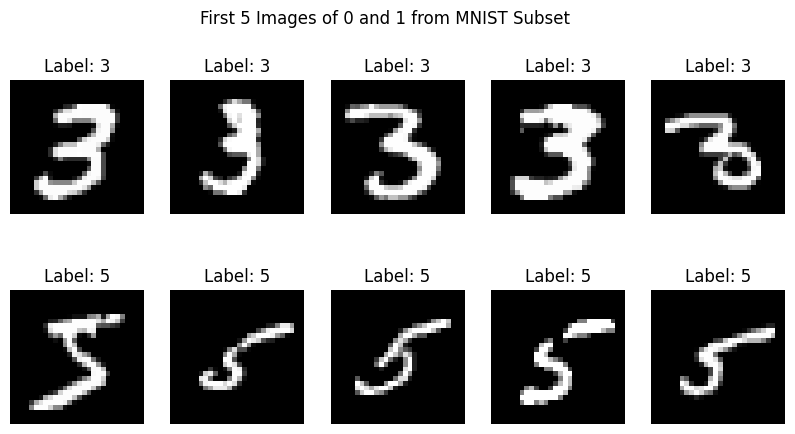

In [18]:
# Separate images for label 3 and label 5
images_3 = X[y == 3]  # Get all images with label 3
images_5 = X[y == 5]  # Get all images with label 5

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Check if the arrays have the required amount of data
if len(images_3) < 5 or len(images_5) < 5:
    print("Error: Not enough images in images_0 or images_1 to plot 5 images.")
else:
    for i in range(5):
        # Plot digit 0
        axes[0, i].imshow(images_3[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 3")
        axes[0, i].axis("off")
        # Plot digit 1
        axes[1, i].imshow(images_5[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 5")
        axes[1, i].axis("off")
    plt.suptitle("First 5 Images of 0 and 1 from MNIST Subset")
    plt.show()

## Step - 2 - Initializing the Weights:

In [20]:
# Initialize weights and bias
weights = np.zeros(X.shape[1]) # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

## Step - 3 - Make a Decision function:

In [19]:
import numpy as np

def decision_function(X, weights, bias):
    """
    Compute the predicted labels for the input data.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - weights: Updated weights after training
    - bias: Updated bias after training

    Returns:
    - y_pred_all: The predicted labels for the input data
    """
    predictions = np.dot(X, weights) + bias
    y_pred_all = np.where(predictions >= 0, 5, 3)

    return y_pred_all

## Step - 3 - Implement the Perceptron Learning Algorithm

In [21]:
def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """
    Train the perceptron using the Perceptron Learning Algorithm.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - y: Labels (true output) as a numpy array of shape (n_samples,)
    - weights: Initial weights as a numpy array of shape (n_features,)
    - bias: Initial bias value (scalar)
    - learning_rate: Learning rate for weight updates (default is 0.1)
    - epochs: Number of iterations to train the model (default is 100)

    Returns:
    - weights: Updated weights after training
    - bias: Updated bias after training
    - accuracy: Total correct prediction.
    """
    # Step 3: Perceptron Learning Algorithm
    # Your Code here#
    for epoch in range(epochs):
      y_pred = decision_function(X, weights, bias)
      for i in range(X.shape[0]):
        error = y[i] - y_pred[i]

        weights += learning_rate * error * X[i]

        bias += learning_rate * error

      y_pred = decision_function(X, weights, bias)
      accuracy = np.mean(y_pred == y)

      if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}, Accuracy: {accuracy:.4f}")

    return weights, bias, accuracy

## Training the Perceptron

In [22]:
# After training the model with the perceptron_learning_algorithm
weights, bias, accuracy = train_perceptron(X, y, weights, bias)

# Evaluate the model using the new function
print("The Final Accuracy is: ", accuracy)

Epoch 10, Accuracy: 0.9208
Epoch 20, Accuracy: 0.9398
Epoch 30, Accuracy: 0.9482
Epoch 40, Accuracy: 0.9493
Epoch 50, Accuracy: 0.9562
Epoch 60, Accuracy: 0.9362
Epoch 70, Accuracy: 0.9453
Epoch 80, Accuracy: 0.9559
Epoch 90, Accuracy: 0.9570
Epoch 100, Accuracy: 0.9577
The Final Accuracy is:  0.9576796789492886


Final Accuracy: 0.9577


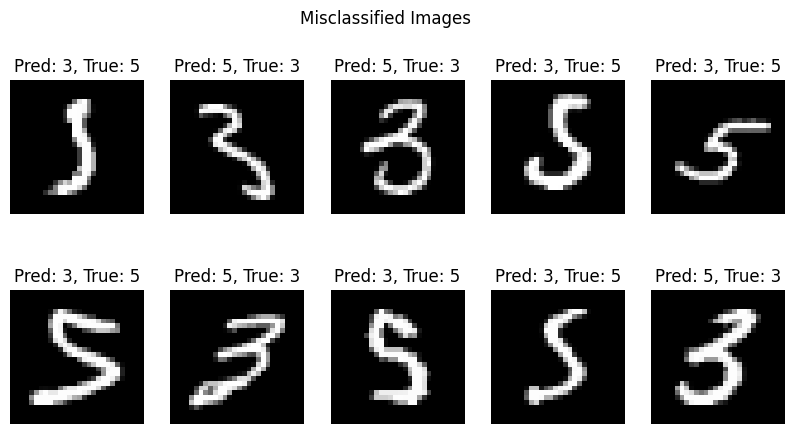

In [23]:
# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 3, 5, 3)

# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")

# Step 5: Visualize Misclassified Images
misclassified_idx = np.where(y_pred != y)[0]
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Show 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")